In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Customer_Feedback_Data.csv')

In [3]:
df.head()

,Customer_ID,Satisfaction_Score,Feedback_Comments,Likelihood_to_Recommend
0,1,10.0,Very satisfied,9
1,2,3.0,Very satisfied,3
2,3,10.0,Very satisfied,1
3,4,7.0,Needs improvement,4
4,5,8.0,Unsatisfactory,7


In [4]:
print(df.isnull().sum())

Customer_ID                  0
Satisfaction_Score         101
Feedback_Comments            0
Likelihood_to_Recommend      0
dtype: int64


In [6]:
import pandas as pd

In [8]:
data = {'Satisfaction_Score': [4.5, 3.0, None, 5.0]}
customer_feedback_Data = pd.DataFrame(data)

In [9]:
customer_feedback_Data

,Satisfaction_Score
0,4.5
1,3.0
2,NaN
3,5.0


In [10]:
customer_feedback_Data['Satisfaction_Score'] = customer_feedback_Data['Satisfaction_Score'].fillna(
    customer_feedback_Data['Satisfaction_Score'].mean()
)
print(customer_feedback_Data)

   Satisfaction_Score
0            4.500000
1            3.000000
2            4.166667
3            5.000000


In [11]:
customer_feedback_Data = customer_feedback_Data.dropna(subset=['Satisfaction_Score'])
print(customer_feedback_Data)

   Satisfaction_Score
0            4.500000
1            3.000000
2            4.166667
3            5.000000


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_feedback_Data['Satisfaction_Score'] = scaler.fit_transform(
    customer_feedback_Data[['Satisfaction_Score']]
)
print(customer_feedback_Data)

   Satisfaction_Score
0            0.452911
1           -1.585188
2            0.000000
3            1.132277


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
customer_feedback_Data['Satisfaction_Score'] = scaler.fit_transform(
    customer_feedback_Data[['Satisfaction_Score']]
)
print(customer_feedback_Data)

   Satisfaction_Score
0            0.750000
1            0.000000
2            0.583333
3            1.000000


In [14]:
print(customer_feedback_Data.describe())

       Satisfaction_Score
count            4.000000
mean             0.583333
std              0.424918
min              0.000000
25%              0.437500
50%              0.666667
75%              0.812500
max              1.000000


In [15]:
print(customer_feedback_Data['Satisfaction_Score'].count())

4


In [16]:
customer_feedback_Data['Category'] = customer_feedback_Data['Satisfaction_Score'].apply(
    lambda x: 'High' if x >= 4 else 'Low'
)
print(customer_feedback_Data)

   Satisfaction_Score Category
0            0.750000      Low
1            0.000000      Low
2            0.583333      Low
3            1.000000      Low


In [22]:
customer_feedback_Data.to_csv('customer_feedback.csv', index=False)

In [23]:
customer_feedback_Data.to_excel('customer_feedback.xlsx', index=False)

In [2]:
import os

if os.path.exists('customer_feedback.xlsx'):
    print("File saved successfully!")
else:
    print("File not found.")

File saved successfully!


In [3]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('customer_feedback.xlsx')

# Print the contents to verify
print(df)

   Satisfaction_Score Category
0            0.750000      Low
1            0.000000      Low
2            0.583333      Low
3            1.000000      Low


In [4]:
print(df.describe())

       Satisfaction_Score
count            4.000000
mean             0.583333
std              0.424918
min              0.000000
25%              0.437500
50%              0.666667
75%              0.812500
max              1.000000


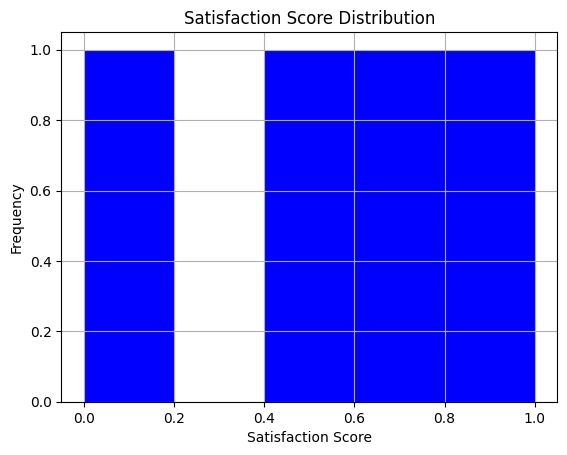

In [5]:
import matplotlib.pyplot as plt

df['Satisfaction_Score'].hist(bins=5, color='blue')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Satisfaction Score Distribution')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X = df[['Satisfaction_Score']]  # Features
y = df['Category']  # Target variable (make sure 'Category' column exists)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:\n", X_train)
print("Testing set:\n", X_test)

Training set:
    Satisfaction_Score
3            1.000000
0            0.750000
2            0.583333
Testing set:
    Satisfaction_Score
1                 0.0


1. What transformations did you apply to categorical variables?

Categorical Transformation:

In our dataset, the Category column is the only categorical feature that we created. We transformed the Satisfaction_Score into the Category feature by applying a binary classification rule:

If Satisfaction_Score >= 4, label it as 'High'.
If Satisfaction_Score < 4, label it as 'Low'.

This transformation is useful if FinMark plans to perform a classification task based on satisfaction levels and wants to predict whether a customer will have a high or low satisfaction score.

2.How did you create new features, and what purpose do they serve?

New Feature Creation:

We created the new Category feature by categorizing the Satisfaction_Score into two groups: 'High' and 'Low'.

The Category feature serves as a target variable for classification tasks. It allows us to classify feedback as either "High" or "Low" satisfaction based on the Satisfaction_Score. By doing so, we can train a classification model to predict the satisfaction category of new data based on the Satisfaction_Score or other features.

